In [1]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical


In [2]:
(x_train,y_train), (x_test,y_test) = load_data()

In [3]:
x_train.max()

255

In [4]:
x_train.min()

0

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
import matplotlib.pyplot as plt
import pandas as pd

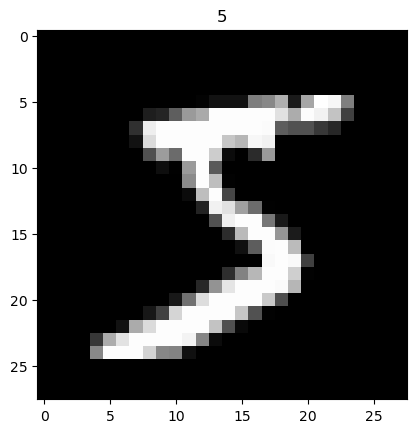

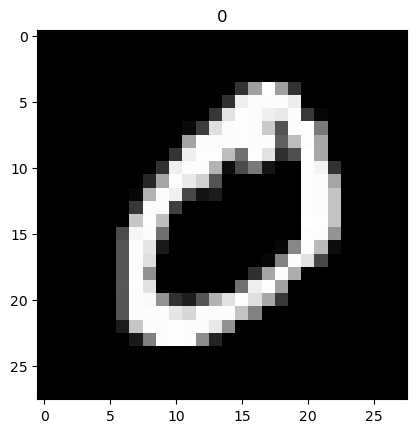

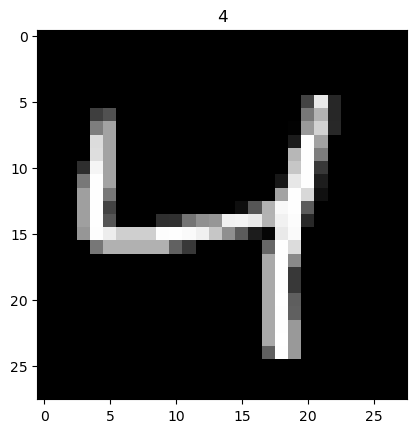

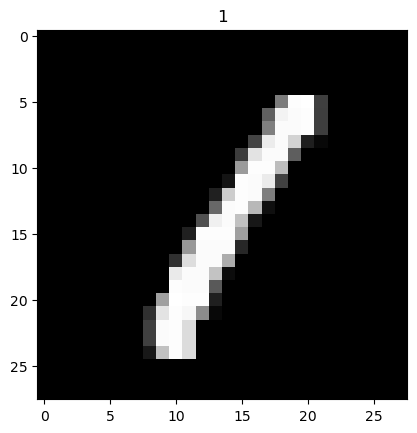

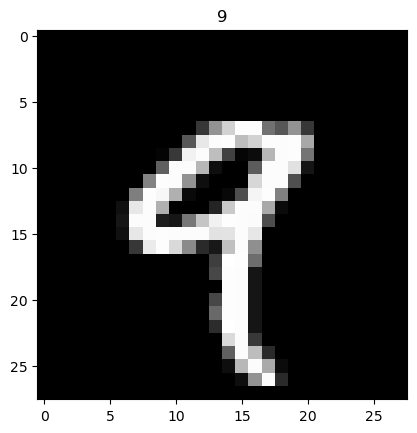

In [7]:
for i in range(5):
    plt.imshow(x_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.show()

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
pd.DataFrame(x_train[0]).to_clipboard()

In [10]:
x_train = x_train.reshape(-1,784)/255

In [11]:
x_test = x_test.reshape(-1,784)/255

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [13]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [14]:
print(x_train.shape)
print(y_train_ohe.shape)
print(x_test.shape)
print(y_test_ohe.shape)


(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import L1L2

In [16]:
model = Sequential()
model.add(Input(shape=(784,)))
# model.add(Dropout(0.1))
model.add(Dense(units=30,activation="relu", kernel_regularizer=L1L2(l1=0,l2=0.1)))
model.add(Dense(units=10, activation="softmax"))

In [17]:
model.compile(optimizer=Adadelta(learning_rate = 0.01),loss="binary_crossentropy", metrics= ["accuracy"] )

In [18]:
model.fit(x=x_train, y=y_train_ohe, epochs=200, validation_data=(x_test, y_test_ohe), batch_size = 1000)

Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0589 - loss: 6.3599 - val_accuracy: 0.0604 - val_loss: 6.2201
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0594 - loss: 6.1724 - val_accuracy: 0.0618 - val_loss: 6.0290
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0639 - loss: 5.9805 - val_accuracy: 0.0628 - val_loss: 5.8344
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0684 - loss: 5.7858 - val_accuracy: 0.0672 - val_loss: 5.6372
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0721 - loss: 5.5882 - val_accuracy: 0.0716 - val_loss: 5.4379
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0796 - loss: 5.3882 - val_accuracy: 0.0754 - val_loss: 5.2366
Epoch 7/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0811 - loss: 5.1872 - val_accuracy: 0.0791 - val_loss: 5.0342
Epoch 8/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0835 - loss: 4.9847 - val_accuracy: 0.0832 - v

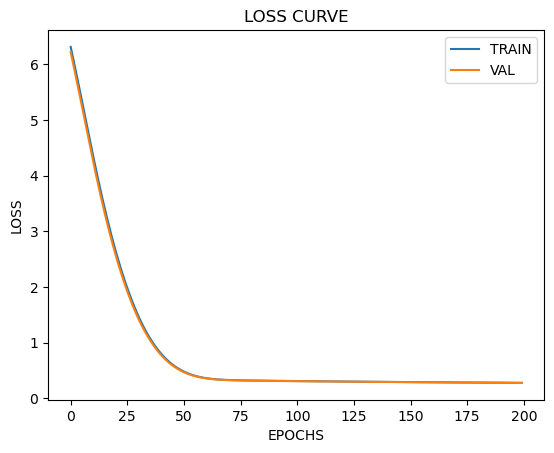

In [19]:
import matplotlib.pyplot as plt

train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.plot(train_loss)
plt.plot(val_loss)

plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend(["TRAIN","VAL"])
plt.title("LOSS CURVE")
plt.grid
plt.show()

In [20]:
model.get_weights()[0].shape

(784, 30)

In [21]:
preds = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [22]:
preds.shape

(10000, 10)

In [23]:
preds

array([[0.06060977, 0.04650106, 0.0570596 , ..., 0.38756362, 0.05551016,
        0.14031829],
       [0.11597046, 0.10015506, 0.18526265, ..., 0.02157116, 0.11554979,
        0.04794393],
       [0.04180338, 0.3661323 , 0.0923254 , ..., 0.06444962, 0.071962  ,
        0.08464444],
       ...,
       [0.03133382, 0.06543396, 0.0507488 , ..., 0.15426862, 0.10820153,
        0.15899195],
       [0.09227738, 0.13175252, 0.08581808, ..., 0.07820272, 0.12895937,
        0.09184872],
       [0.16841961, 0.03825813, 0.11774876, ..., 0.02386039, 0.05494334,
        0.03908036]], dtype=float32)

In [24]:
preds[0]

array([0.06060977, 0.04650106, 0.0570596 , 0.06270937, 0.09158546,
       0.05843404, 0.03970862, 0.38756362, 0.05551016, 0.14031829],
      dtype=float32)

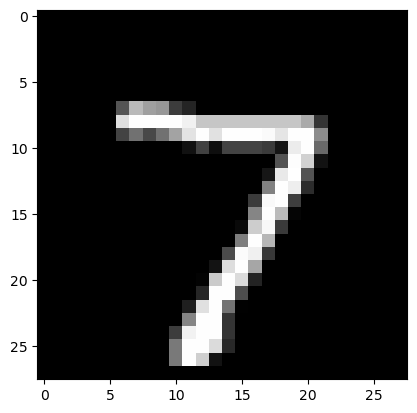

In [34]:
plt.imshow(x_test.reshape(-1,28,28)[0],cmap="gray")
plt.show()

In [26]:
import numpy as np

In [27]:
pred_class = np.argmax(preds, axis=1)

In [28]:
pred_class

array([7, 2, 1, ..., 4, 1, 6], dtype=int64)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y_test, pred_class)

array([[ 951,    0,    2,    6,    0,    0,   11,    1,    9,    0],
       [   0, 1117,    9,    3,    0,    0,    4,    0,    2,    0],
       [  46,  114,  766,   14,   17,    0,   29,   19,   27,    0],
       [  22,   29,   34,  856,    0,    3,    9,   23,   28,    6],
       [   6,   39,    2,    3,  826,    0,   46,   14,    3,   43],
       [  92,   88,    7,  206,   26,  297,   33,   44,   98,    1],
       [  53,   29,   14,    1,   12,    5,  837,    0,    7,    0],
       [   6,   67,   23,    1,   12,    0,    2,  912,    3,    2],
       [  30,   74,   11,  117,    7,    0,   20,   31,  673,   11],
       [  27,   31,    7,   17,  160,    0,    5,  474,   10,  278]],
      dtype=int64)

In [31]:
import pandas as pd

In [32]:
pd.DataFrame({"actual":y_test, "predicted":pred_class})

,actual,predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,1
